In [22]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

In [23]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [24]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [25]:
df = pd.read_csv('./DeepLearningAssignment/compresive_strength_concrete.csv')

In [26]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [27]:
df.isnull().any()

Cement (component 1)(kg in a m^3 mixture)                False
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    False
Fly Ash (component 3)(kg in a m^3 mixture)               False
Water  (component 4)(kg in a m^3 mixture)                False
Superplasticizer (component 5)(kg in a m^3 mixture)      False
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     False
Fine Aggregate (component 7)(kg in a m^3 mixture)        False
Age (day)                                                False
Concrete compressive strength(MPa, megapascals)          False
dtype: bool

In [28]:
np.where(df.applymap(lambda x: x == ''))
X_train = df.sample(frac = 0.7, random_state = 123)
X_test = df.drop(X_train.index)
X_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30
13,190.0,190.0,0.0,228.0,0.0,932.0,670.0,90,42.33
996,152.6,238.7,0.0,200.0,6.3,1001.8,683.9,28,26.86
770,349.0,0.0,0.0,192.0,0.0,1047.0,806.0,3,14.99
937,313.3,0.0,113.0,178.5,8.0,1001.9,688.7,28,36.80


In [29]:
Y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,0:-1]
Y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,0:-1]
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std
X_test -= X_mean
X_test /= X_std
Y_mean = Y_train.mean()
Y_train -= Y_mean
Y_std = Y_train.std()
Y_train /= Y_std
Y_test -= Y_mean
Y_test /= Y_std
X_train.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                float64
dtype: object

In [30]:
X_train = X_train.to_numpy()
Y_train = Y_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()

In [31]:
network = models.Sequential()
network.add(layers.Dense(128,activation="relu",input_shape=(X_train.shape[1],)))
network.add(layers.Dense(64,activation="relu"))
network.add(layers.Dense(32,activation="relu"))
network.add(layers.Dense(1))

In [32]:
network.compile(optimizer="rmsprop",loss=["mse"],metrics=["mae"])
history = network.fit(X_train,Y_train,epochs=100,validation_split=0.3, batch_size = 16)


Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.7998 - mae: 0.7121 - val_loss: 0.4673 - val_mae: 0.5679
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.3989 - mae: 0.5034 - val_loss: 0.3192 - val_mae: 0.4648
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2578 - mae: 0.3991 - val_loss: 0.2693 - val_mae: 0.4077
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2093 - mae: 0.3468 - val_loss: 0.2414 - val_mae: 0.3829
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1616 - mae: 0.3177 - val_loss: 0.2662 - val_mae: 0.4040
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1572 - mae: 0.3086 - val_loss: 0.2348 - val_mae: 0.3702
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1402 - mae: 0.2964 - val_loss: 0.2361 - val_mae: 0.3583
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.1102 - m

In [33]:
history.history.keys()
loss,mae=network.evaluate(X_test,Y_test)
val_mae = history.history['val_mae']
val_loss = history.history['val_loss']

10/10 [==============================] - 0s 2ms/step - loss: 0.1225 - mae: 0.2293


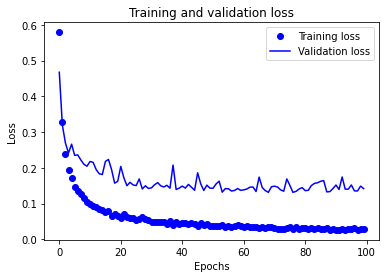

In [34]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(100)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

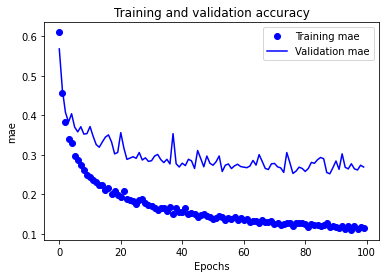

In [35]:
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
plt.plot(epochs, acc_values, 'bo', label='Training mae')
plt.plot(epochs, val_acc_values, 'b', label='Validation mae')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('mae')
plt.legend()
plt.show()